In [1]:
# Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA

In [3]:
# Load datasets
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

# Merge datasets on 'CustomerID'
merged_data = transactions.merge(customers, on='CustomerID', how='left')

# Preview merged data
merged_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15


In [4]:
# Feature Engineering

In [5]:
# Aggregate features for customer profiles
customer_profiles = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',   # Total revenue
    'TransactionID': 'count',  # Total number of transactions
    'Price': 'mean',  # Average transaction value
}).reset_index()

# Rename columns for clarity
customer_profiles.rename(columns={
    'TotalValue': 'TotalRevenue',
    'TransactionID': 'TotalTransactions',
    'Price': 'AvgTransactionValue',
}, inplace=True)

# Preview customer profiles
customer_profiles.head()

,CustomerID,TotalRevenue,TotalTransactions,AvgTransactionValue
0,C0001,3354.52,5,278.334000
1,C0002,1862.74,4,208.920000
2,C0003,2725.38,4,195.707500
3,C0004,5354.88,8,240.636250
4,C0005,2034.24,3,291.603333


In [6]:
# Data Preprocessing

In [7]:
# Standardize numerical columns
scaler = StandardScaler()
numerical_cols = ['TotalRevenue', 'TotalTransactions', 'AvgTransactionValue']
customer_profiles[numerical_cols] = scaler.fit_transform(customer_profiles[numerical_cols])

# Preview scaled data
customer_profiles.head()

,CustomerID,TotalRevenue,TotalTransactions,AvgTransactionValue
0,C0001,-0.061701,-0.011458,0.094670
1,C0002,-0.877744,-0.467494,-0.904016
2,C0003,-0.405857,-0.467494,-1.094109
3,C0004,1.032547,1.356650,-0.447702
4,C0005,-0.783929,-0.923530,0.285581


In [8]:
# Clustering Algorithm Selection

In [17]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=9, n_init=10, random_state=42)  # Start with 2 clusters as an example
customer_profiles['Cluster'] = kmeans.fit_predict(customer_profiles[numerical_cols])

# Preview clusters
customer_profiles.head()

C:\Users\adity\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,CustomerID,TotalRevenue,TotalTransactions,AvgTransactionValue,Cluster,PCA1,PCA2
0,C0001,-0.061701,-0.011458,0.094670,0,-0.020679,0.091606
1,C0002,-0.877744,-0.467494,-0.904016,8,-1.201030,-0.599798
2,C0003,-0.405857,-0.467494,-1.094109,8,-0.929568,-0.780487
3,C0004,1.032547,1.356650,-0.447702,1,1.447995,-1.005168
4,C0005,-0.783929,-0.923530,0.285581,0,-1.048744,0.668463


In [10]:
# Evaluation with DB Index

In [18]:
# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(customer_profiles[numerical_cols], customer_profiles['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')

Davies-Bouldin Index: 0.9186115523015295


In [12]:
# Cluster Visualization

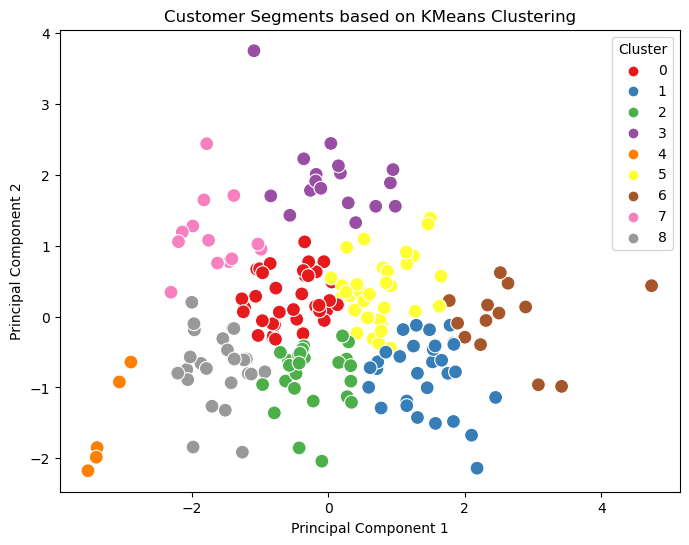

In [19]:
# # Apply PCA for 2D visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(customer_profiles[numerical_cols])

# Add PCA components to the data
customer_profiles['PCA1'] = pca_components[:, 0]
customer_profiles['PCA2'] = pca_components[:, 1]

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=customer_profiles, palette='Set1', s=100)
plt.title('Customer Segments based on KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [14]:
# Fine-Tuning Clustering

C:\Users\adity\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

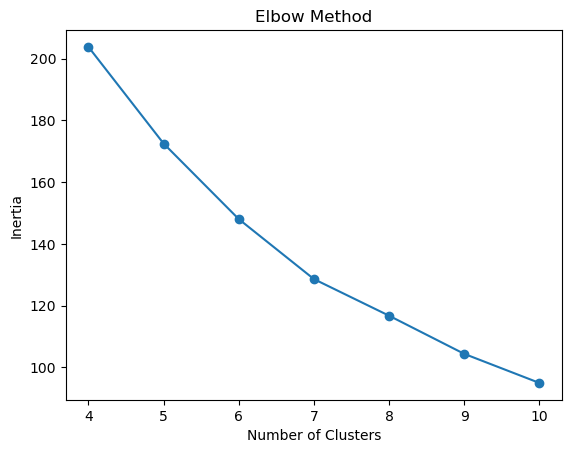

In [15]:
# Elbow Method
inertia = []
for i in range(4, 11):  # Try 4 to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(customer_profiles[numerical_cols])
    inertia.append(kmeans.inertia_)

plt.plot(range(4, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [20]:
# Silhouette Score
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(customer_profiles[numerical_cols], customer_profiles['Cluster'])
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.2966361734100733


In [ ]:
# Clutering Results:

# Number of Clusters formed: 7
# DB Index value: 0.9186115523015295
# Silhouette Score: 0.2966361734100733